In [1]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

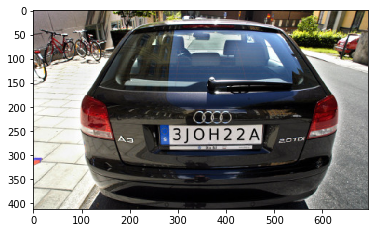

In [167]:
img = cv2.imread('C://Users//syerekar//Videos//OpenCv//Computer-Vision-with-Python//DATA/car1.PNG')
image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(image)

In [168]:

def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

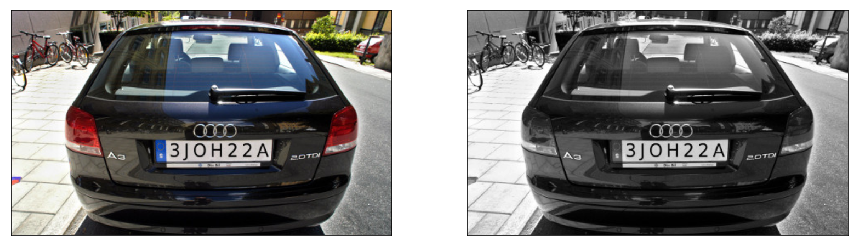

In [169]:
plot_images(image,gray)

In [189]:
#blur= cv2.medianBlur(gray,9)
#blur = cv2.blur(gray,ksize=(5,5))
#blur =  cv2.GaussianBlur(gray,(5,5),50)
blur = cv2.bilateralFilter(gray, 11,90,90)


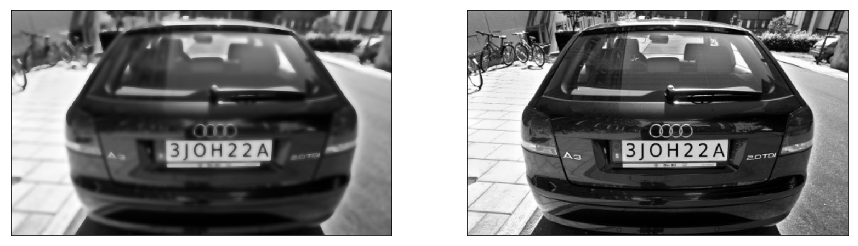

In [190]:
plot_images(blur,gray)

In [191]:
edges = cv2.Canny(blur, 30,180 )

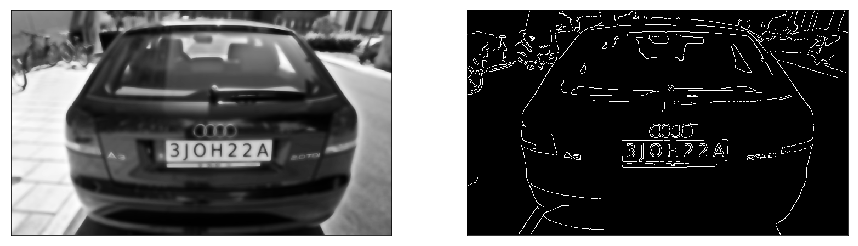

In [192]:
plot_images(blur, edges)

In [193]:
new,cnts,hierarchy = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [194]:
image_copy = image.copy()

In [195]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

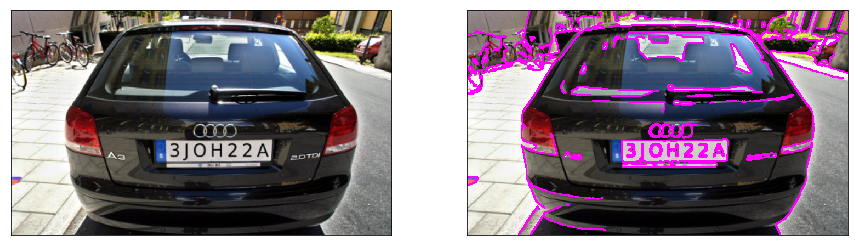

In [196]:
plot_images(image, image_copy)

In [197]:
print(len(cnts))

130


In [198]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [199]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

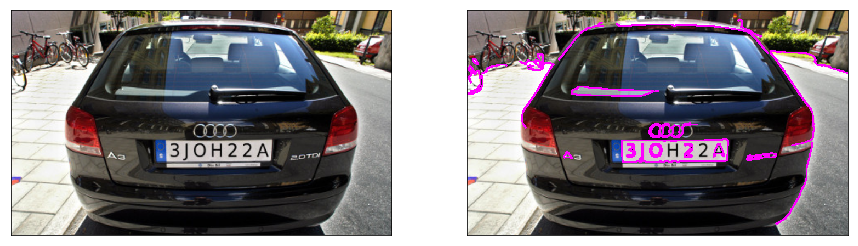

In [200]:
plot_images(image, image_copy)

In [201]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

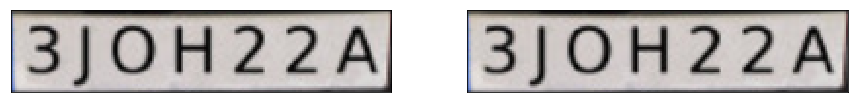

In [202]:
plot_images(plate, plate)

In [ ]:
#import pytesseract
#text = pytesseract.image_to_string(plate, lang="eng")

In [1]:
pwd

'C:\\Users\\syerekar\\Videos\\OpenCv\\Computer-Vision-with-Python\\02-Image-Processing'